<img src="https://xn--espaa-rta.werfen.com/hubfs/logo-werfen-blue-pos-rgb.png" 
     align="center" 
     width="200"/>

# **Werfen Data Impact Case**

***
## 0. Introduction

**End-to-End Enterprise Data Architecture**  
Daniel Moreno

**Objective**
Demonstrate a complete data architecture implementing customer segmentation through ML pipeline for business impact. This solution showcases modern data engineering practices with enterprise-grade components.

**Key Deliverables**
- **Impact-First Strategy**: Business-driven approach to customer segmentation
- **Medallion Architecture**: Raw → Staging → Intermediate → Marts layers  
- **ML Pipeline**: K-means clustering for customer personas
- **Enterprise Components**: Data validation, orchestration, and quality assurance

**Business Goal**
Increase Net Revenue +10% through actionable customer segmentation, moving from "one-size-fits-all" to targeted, data-driven customer strategies.

***
## 1. Environment Setup

First, let's set up the environment and check that we have all required dependencies.

In [1]:
# 🔧 Import Setup for ML Pipeline
# ================================

import sys
from pathlib import Path

# Add src to path to import ML pipeline
src_path = str(Path.cwd().parent / 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

print(f"📁 Src path added: {src_path}")
print("✅ Import setup complete")

📁 Src path added: c:\Users\danie\Downloads\werfen-data-impact-case\src
✅ Import setup complete


### 1.5. 🧹 Environment Cleanup (Optional)

**OPTIONAL**: If you want to start completely from scratch, run this cell to clean all dbt tables and artifacts.

⚠️ **WARNING**: This will delete all tables created by dbt. Only run if you want a complete reset.

In [2]:
# 🧹 COMPLETE DBT ENVIRONMENT CLEANUP (OPTIONAL)
# ⚠️ UNCOMMENT ONLY IF YOU WANT TO START FROM SCRATCH
# This function will delete ALL dbt tables and artifacts

# Import required libraries
import sys
from pathlib import Path

# Import analyzer (if not done already)
try:
    analyzer
    print("✅ Analyzer already available")
except NameError:
    sys.path.append('../')
    from src.analysis import DataWarehouseAnalyzer
    analyzer = DataWarehouseAnalyzer()
    print("✅ Analyzer created successfully")

# UNCOMMENT THE FOLLOWING LINE TO CLEAN COMPLETELY:
analyzer.clean_all_dbt_tables()

print("🛡️  Cleanup cell ready (commented for safety)")
print("💡 To clean completely, uncomment line: analyzer.clean_all_dbt_tables()")

✅ Analyzer created successfully
🔄 COMPLETE DBT ENVIRONMENT RESET
🎯 Preparing environment for execution from scratch

🧹 COMPLETE DBT TABLE CLEANUP
🎯 Removing all tables to start from scratch

🔌 Connected to DuckDB database
📍 Path: C:\Users\danie\Downloads\werfen-data-impact-case\artifacts\werfen.db

🗂️  Cleaning schema: main_staging
----------------------------------------
   ℹ️  No tables in schema main_staging
🗂️  Cleaning schema: main_intermediate
----------------------------------------
   ℹ️  No tables in schema main_intermediate
🗂️  Cleaning schema: main_marts
----------------------------------------
   ℹ️  No tables in schema main_marts

🗂️  Cleaning dbt tables in schema: main
----------------------------------------
   ✅ Dropped table: main.stg_customers
   ✅ Dropped table: main.stg_sales_transactions
   ✅ Dropped table: main.stg_foc_transactions
   ✅ Dropped table: main.int_customer_metrics
   ✅ Dropped table: main.int_sales_aggregated
   ✅ Dropped table: main.fct_transactions


In [3]:
# Import required libraries
import pandas as pd
import sqlite3
import duckdb
import subprocess
import sys
import os
from pathlib import Path
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for advanced data analysis
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

try:
    from ydata_profiling import ProfileReport
    from IPython.display import display, HTML
    import ipywidgets as widgets
    from tqdm import tqdm
    print("📊 ydata-profiling available for automatic analysis")
    print("🎛️  Interactive widgets available")
    profiling_available = True
except ImportError:
    # Suppress error messages for optional dependencies
    profiling_available = False

# 🔧 UNIFIED CONFIGURATION - NEW FUNCTIONALITY
sys.path.append('../')
from config import WerfenConfig

print("✅ All dependencies imported successfully")
print(f"📍 Current working directory: {Path.cwd()}")

# Get unified configuration
config = WerfenConfig()
print(f"🔧 Configuration loaded: {config.__class__.__name__}")
print(f"📁 Project root: {config.project_root}")

# Verify data files using configuration
data_dir = config.raw_data_folder
if (data_dir / "chinook.db").exists() and (data_dir / "example.db").exists():
    print("✅ Source data files found")
    print(f"📍 Data directory: {data_dir}")
else:
    print("❌ Source data files missing - run ingestion first")
    print(f"📍 Looking in: {data_dir}")

📊 ydata-profiling available for automatic analysis
🎛️  Interactive widgets available
✅ All dependencies imported successfully
📍 Current working directory: c:\Users\danie\Downloads\werfen-data-impact-case\notebooks
🔧 Configuration loaded: WerfenConfig
📁 Project root: C:\Users\danie\Downloads\werfen-data-impact-case
✅ Source data files found
📍 Data directory: C:\Users\danie\Downloads\werfen-data-impact-case\data\raw


***
## 2. Data Ingestion and Validation

We'll run our data ingestion pipeline. This step shows:
- **Extract**: Reading from source SQLite databases
- **Load**: Loading into our DuckDB data warehouse
- **Validate**: Ensuring data quality through automated checks

In [4]:
# 🚀 SIMPLIFIED INGESTION AND VALIDATION PIPELINE
# Import unified analyzer from new structure
sys.path.append('../')
from src.analysis import DataWarehouseAnalyzer

# Create analyzer
analyzer = DataWarehouseAnalyzer()

# Run complete ingestion and validation pipeline
# NOTE: No parameters = clean output for presentations
analyzer.run_ingestion_pipeline()

🚀 STARTING INGESTION AND VALIDATION PIPELINE
📋 This pipeline executes two critical phases:
   1️⃣ INGESTION: Data extraction and loading from sources
   2️⃣ VALIDATION: 21 quality expectations distributed in 4 categories
   🎯 Objective: Certify data ready for enterprise production

🔄 PHASE 1: DATA INGESTION
----------------------------------------
📥 Ingestion process:
   • Connecting to SQLite sources (chinook.db, example.db)
   • Extracting tables: customers, invoices, invoice_items
   • Transforming to Raw Layer format
   • Loading into DuckDB warehouse (werfen.db)
   • Applying credential encryption

⏳ Running ingestion script...
✅ INGESTION COMPLETED SUCCESSFULLY
📊 Ingestion results:
   • raw_customer: 59 records loaded
   • raw_sales_quantity: 500,000 transactions processed
   • raw_free_of_charge_quantity: 500,000 samples loaded
   • Referential integrity: Maintained
   • Encryption: Applied correctly
📋 Technical log: Using robust encryption (cryptography)

🔍 PHASE 2: DATA QUALIT

***
## 3. Data Warehouse Verification

We'll verify that our data loaded correctly using the **correct table names**.
Now we'll create functions to analyze table metadata interactively.

In [5]:
# 📋 AVAILABLE TABLES BY LAYER (REAL DBT METADATA)
# Show all tables with dynamic metadata from dbt manifest.json
analyzer.show_available_tables_with_dbt_metadata()

📋 TABLE CATALOG WITH REAL DBT METADATA
🎯 Metadata obtained directly from dbt manifest.json

🔄 Cargando metadatos desde dbt...
⚠️  manifest.json file not found at: C:\Users\danie\Downloads\werfen-data-impact-case\dbt_project\target\manifest.json
💡 Run 'dbt compile' or 'dbt run' to generate metadata
⚠️  Could not load dbt metadata. Using standard function...
📋 CATÁLOGO COMPLETO DE TABLAS DEL DATA WAREHOUSE
🎯 Arquitectura de 4 capas con separación clara de responsabilidades

🏗️  RAW LAYER (schema: raw)
──────────────────────────────────────────────────────────────────────

📊 raw_customer
   🎯 Propósito: Datos maestros de clientes desde sistema CRM
   📏 Granularidad: Un registro por cliente único
   🔌 Sistema fuente: Chinook Database (SQLite)
   🔄 Carga: Diaria (Full Refresh)
   📈 Volumen: 59 clientes
   🔑 Campos clave: CustomerId (PK), FirstName, LastName, Email
   🛡️  Clasificación: PII - Datos Personales
   ⏰ SLA: 99.9%

📊 raw_sales_quantity
   🎯 Propósito: Transacciones de ventas por c

In [6]:
# 🎯 DEMO: Detailed analysis of raw_customer table
analyzer.analyze_table_metadata('raw_customer', 'raw', show_sample=False)
# analyzer.generate_table_profile('raw_sales_quantity', 'raw', sample_size=1000)

🏷️  DETAILED ANALYSIS: raw.raw_customer
📊 BASIC STATISTICS:
   • Records: 59 rows
   • Columns: 13
   • Estimated size: 0.01 MB

📝 BUSINESS METADATA:
   • Description: Customer master data from CRM system
   • Source System: Chinook Database (SQLite)
   • Load Frequency: Daily
   • Load Type: Full Refresh
   • Granularity: Single customer
   • Partitioning: Not partitioned
   • Key Fields: CustomerId, FirstName, LastName, Email
   • Availability Sla: 99.9%
   • Data Owner: CRM Team
   • Data Classification: PII - Personal Data

📋 DATA SCHEMA:
   • CustomerId: BIGINT
   • FirstName: VARCHAR
   • LastName: VARCHAR
   • Company: VARCHAR
   • Address: VARCHAR
   • City: VARCHAR
   • State: VARCHAR
   • Country: VARCHAR
   • PostalCode: VARCHAR
   • Phone: VARCHAR
   • Fax: VARCHAR
   • Email: VARCHAR
   • SupportRepId: BIGINT

🎯 DETAILED GREAT EXPECTATIONS:

📋 DATA VOLUME:
   ✅ Between 50 and 70 rows
      → 59 rows

📋 DATA STRUCTURE:
   ✅ Column 'CustomerId' must exist
      → Column exis

{'table_name': 'raw_customer',
 'schema': [{'column_name': 'CustomerId', 'column_type': 'BIGINT'},
  {'column_name': 'FirstName', 'column_type': 'VARCHAR'},
  {'column_name': 'LastName', 'column_type': 'VARCHAR'},
  {'column_name': 'Company', 'column_type': 'VARCHAR'},
  {'column_name': 'Address', 'column_type': 'VARCHAR'},
  {'column_name': 'City', 'column_type': 'VARCHAR'},
  {'column_name': 'State', 'column_type': 'VARCHAR'},
  {'column_name': 'Country', 'column_type': 'VARCHAR'},
  {'column_name': 'PostalCode', 'column_type': 'VARCHAR'},
  {'column_name': 'Phone', 'column_type': 'VARCHAR'},
  {'column_name': 'Fax', 'column_type': 'VARCHAR'},
  {'column_name': 'Email', 'column_type': 'VARCHAR'},
  {'column_name': 'SupportRepId', 'column_type': 'BIGINT'}],
 'exists': True,
 'analysis_timestamp': '2025-07-01T15:13:25.211436',
 'row_count': 59,
 'column_count': 13,
 'estimated_size_mb': 0.00585174560546875,
 'business_metadata': {'description': 'Customer master data from CRM system',
 

***
## 4. dbt Transformations - Staging Layer

We'll run our **dbt (data build tool)** transformation pipeline. This shows:

- **Modern data engineering practices**: Versioned SQL transformations
- **Layered architecture**: Raw → Staging → Intermediate → Marts
- **Data quality testing**: Built-in tests for integrity

In [7]:
# 🔄 UNIFIED DBT TRANSFORMATIONS
# Run complete dbt pipeline using centralized function
analyzer.run_dbt_transformations()

🔄 STARTING DBT TRANSFORMATIONS
0️⃣ Installing dbt dependencies...
🔄 Command: dbt deps
📊 Return code: 0
✅ dbt dependencies installed correctly
📋 Output: 13:13:26  Running with dbt=1.10.2
13:13:27  [WARNING]: Deprecated functionality
The `calogica/dbt_expectations` package is deprecated in favor of
`metaplane/dbt_expectations`. Please update your `packages.yml` configuration to
use `metaplane/dbt_expectations` instead.
13:13:27  Installing dbt-labs/dbt_utils
13:13:27  Installed from version 1.1.1
13:13:27  Updated version available: 1.3.0
13:13:27  Installing calogica/dbt_expectations
13:13:28  Installed from version 0.10.1
13:13:28  Updated version available: 0.10.4
13:13:28  Installing calogica/dbt_date
13:13:28  Installed from version 0.10.1
13:13:28  Up to date!
13:13:28  
13:13:28  Updates available for packages: ['dbt-labs/dbt_utils', 'calogica/dbt_expectations']                 
Update your versions in packages.yml, then run dbt deps
13:13:28  [WARNING][DeprecationsSummary]: Depre

{'models_created': 9,
 'tests_passed': 121,
 'tests_failed': 1,
 'success': True,
 'execution_time': 26.20180058479309,
 'layer_analysis': {'Raw Layer': {'tables': [{'name': 'raw_customer',
     'records': 59,
     'exists': True},
    {'name': 'raw_sales_quantity', 'records': 500000, 'exists': True},
    {'name': 'raw_free_of_charge_quantity',
     'records': 500000,
     'exists': True}],
   'total_records': 1000059,
   'tables_found': 3,
   'tables_expected': 3},
  'Staging Layer': {'tables': [{'name': 'stg_customers',
     'records': 59,
     'exists': True},
    {'name': 'stg_sales_transactions', 'records': 500000, 'exists': True},
    {'name': 'stg_foc_transactions', 'records': 500000, 'exists': True}],
   'total_records': 1000059,
   'tables_found': 3,
   'tables_expected': 3},
  'Intermediate Layer': {'tables': [{'name': 'int_customer_analytics',
     'records': 6000,
     'exists': True},
    {'name': 'int_transactions_unified', 'records': 954828, 'exists': True}],
   'total_r

In [8]:
# 📊 SIMPLIFIED DATA WAREHOUSE VERIFICATION
# Show complete DW structure by layers
analyzer.show_dw_structure()

📊 DATA WAREHOUSE STRUCTURE

🏗️  Raw Layer (schema: raw):
   ✅ raw_customer - Customer master data from CRM system: 59 records
   ✅ raw_sales_quantity - Sales transactions per customer and period: 500,000 records
   ✅ raw_free_of_charge_quantity - Free of charge (FOC) products delivered to customers: 500,000 records
   📊 Summary: 3/3 tables | 1,000,059 total records

🏗️  Staging Layer (schema: main_staging):
   ✅ stg_customers - Data table: 59 records
   ✅ stg_sales_transactions - Data table: 500,000 records
   ✅ stg_foc_transactions - Data table: 500,000 records
   📊 Summary: 3/3 tables | 1,000,059 total records

🏗️  Intermediate Layer (schema: main_intermediate):
   ✅ int_customer_analytics - Data table: 6,000 records
   ✅ int_transactions_unified - Data table: 954,828 records
   📊 Summary: 2/2 tables | 960,828 total records

🏗️  Marts Layer (schema: main_marts):
   ✅ dim_customers - Data table: 59 records
   ✅ fct_transactions - Data table: 6,000 records
   ✅ marts_customer_summary -

{'layers': {'Raw Layer': {'schema': 'raw',
   'tables': [{'name': 'raw_customer',
     'records': 59,
     'exists': True,
     'description': 'Customer master data from CRM system'},
    {'name': 'raw_sales_quantity',
     'records': 500000,
     'exists': True,
     'description': 'Sales transactions per customer and period'},
    {'name': 'raw_free_of_charge_quantity',
     'records': 500000,
     'exists': True,
     'description': 'Free of charge (FOC) products delivered to customers'}],
   'total_records': 1000059,
   'tables_found': 3,
   'tables_expected': 3},
  'Staging Layer': {'schema': 'main_staging',
   'tables': [{'name': 'stg_customers',
     'records': 59,
     'exists': True,
     'description': 'Data table'},
    {'name': 'stg_sales_transactions',
     'records': 500000,
     'exists': True,
     'description': 'Data table'},
    {'name': 'stg_foc_transactions',
     'records': 500000,
     'exists': True,
     'description': 'Data table'}],
   'total_records': 100005

***
## 5. Detailed Data Warehouse Layer Analysis

This section provides detailed analysis of each data warehouse layer, including data visualization and automatic profiling with ydata-profiling.

In [9]:
# Generate EDA report 
# analyzer.generate_table_profile('dim_customers', 'main_marts', sample_size=1000, show_report=True)

# Generate table report 
# analyzer.analyze_table_metadata('stg_customers', 'main_staging', show_sample=False)
analyzer.analyze_table_metadata('dim_customers', 'main_marts', show_sample=False)

🏷️  DETAILED ANALYSIS: main_marts.dim_customers
📊 BASIC STATISTICS:
   • Records: 59 rows
   • Columns: 13
   • Estimated size: 0.01 MB

📋 DATA SCHEMA:
   • customer_key: VARCHAR
   • customer_id: BIGINT
   • first_name: VARCHAR
   • last_name: VARCHAR
   • email: VARCHAR
   • country: VARCHAR
   • city: VARCHAR
   • state: VARCHAR
   • email_missing_flag: INTEGER
   • company_missing_flag: INTEGER
   • full_name: VARCHAR
   • dbt_loaded_at: TIMESTAMP WITH TIME ZONE
   • dbt_updated_at: TIMESTAMP WITH TIME ZONE

🧪 DBT TESTS EXECUTED:

📋 DATA QUALITY:
   ✅ not null customer key
   ✅ not null customer id
   ✅ not null first name
   ✅ not null last name

📋 DATA INTEGRITY:
   ✅ unique customer key
   ✅ unique customer id

📊 DBT TESTS SUMMARY:
   • Total ejecutados: 6
   • Exitosos: 6
   • Fallidos: 0
   • Tasa de éxito: 100.0%


{'table_name': 'dim_customers',
 'schema': [{'column_name': 'customer_key', 'column_type': 'VARCHAR'},
  {'column_name': 'customer_id', 'column_type': 'BIGINT'},
  {'column_name': 'first_name', 'column_type': 'VARCHAR'},
  {'column_name': 'last_name', 'column_type': 'VARCHAR'},
  {'column_name': 'email', 'column_type': 'VARCHAR'},
  {'column_name': 'country', 'column_type': 'VARCHAR'},
  {'column_name': 'city', 'column_type': 'VARCHAR'},
  {'column_name': 'state', 'column_type': 'VARCHAR'},
  {'column_name': 'email_missing_flag', 'column_type': 'INTEGER'},
  {'column_name': 'company_missing_flag', 'column_type': 'INTEGER'},
  {'column_name': 'full_name', 'column_type': 'VARCHAR'},
  {'column_name': 'dbt_loaded_at', 'column_type': 'TIMESTAMP WITH TIME ZONE'},
  {'column_name': 'dbt_updated_at',
   'column_type': 'TIMESTAMP WITH TIME ZONE'}],
 'exists': True,
 'analysis_timestamp': '2025-07-01T15:13:53.246597',
 'row_count': 59,
 'column_count': 13,
 'estimated_size_mb': 0.00585174560546

***
## 6. Machine Learning: Customer Clustering

Now we'll apply **Machine Learning** using the **Werfen Unified ML Pipeline** to segment customers into business personas. This is the heart of our advanced pipeline:

INFO:ml_pipeline.pipeline:🤖 STARTING INTERACTIVE CLUSTERING ANALYSIS
INFO:ml_pipeline.pipeline:==================================================
INFO:ml_pipeline.pipeline:📊 Loading data from main_marts.marts_customer_summary...
INFO:ml_pipeline.data_loader:Loading data from main_marts.marts_customer_summary...
INFO:ml_pipeline.data_loader:Data validations completed
INFO:ml_pipeline.data_loader:Metadata extracted: 0 materials available
INFO:ml_pipeline.data_loader:Data loaded successfully: 3540 records, 7 columns
INFO:ml_pipeline.pipeline:🔧 Preparing features for clustering...
INFO:ml_pipeline.feature_engineering:Creating aggregate features...
INFO:ml_pipeline.feature_engineering:Aggregate features created: 9 features
INFO:ml_pipeline.feature_engineering:Selecting features with strategy: business_driven
INFO:ml_pipeline.feature_engineering:Using the 3 specific features for clustering: ['total_sold_quantity', 'foc_ratio', 'total_sold_transactions']
INFO:ml_pipeline.feature_engineering:S

🤖 STARTING INTERACTIVE CLUSTERING ANALYSIS
🔧 Clustering configuration:
  • K range for evaluation: [2, 3, 4, 5, 6, 7]
  • Selected K: 3
  • Feature strategy: business_driven
  • Persona mapping: {0: 'Loyalists', 1: 'Potentials', 2: 'Champions'}


INFO:ml_pipeline.clustering:Optimal K selected: 2
INFO:ml_pipeline.visualization:Creando gráfico del Elbow Method...


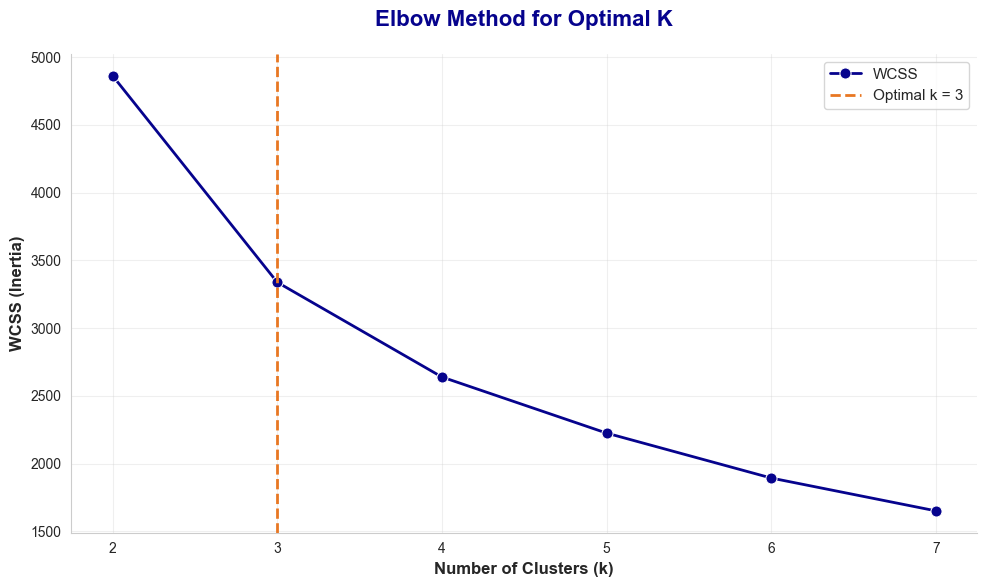

INFO:ml_pipeline.pipeline:🔬 Training final model with K=3...
INFO:ml_pipeline.clustering:Training final model with K=3
INFO:ml_pipeline.clustering:Model trained. Cluster distribution: [1597  888 1055]
INFO:ml_pipeline.pipeline:✅ Clustering completed with 3 clusters
INFO:ml_pipeline.pipeline:
📊 Cluster distribution:
INFO:ml_pipeline.pipeline:  Cluster 0: 1,597 customers (45.1%)
INFO:ml_pipeline.pipeline:  Cluster 1: 888 customers (25.1%)
INFO:ml_pipeline.pipeline:  Cluster 2: 1,055 customers (29.8%)
INFO:ml_pipeline.pipeline:
--- Cluster Profiles (Averages per Cluster) ---
INFO:ml_pipeline.visualization:Creando gráficos de perfiles con 3 features...


         total_sold_quantity  foc_ratio  total_sold_transactions  \
cluster                                                            
0                    12353.4        3.2                     82.5   
1                    10856.0        3.9                     72.7   
2                    14069.3        2.8                     93.6   

         customer_count  pct_customers  
cluster                                 
0                  1597           45.1  
1                   888           25.1  
2                  1055           29.8  


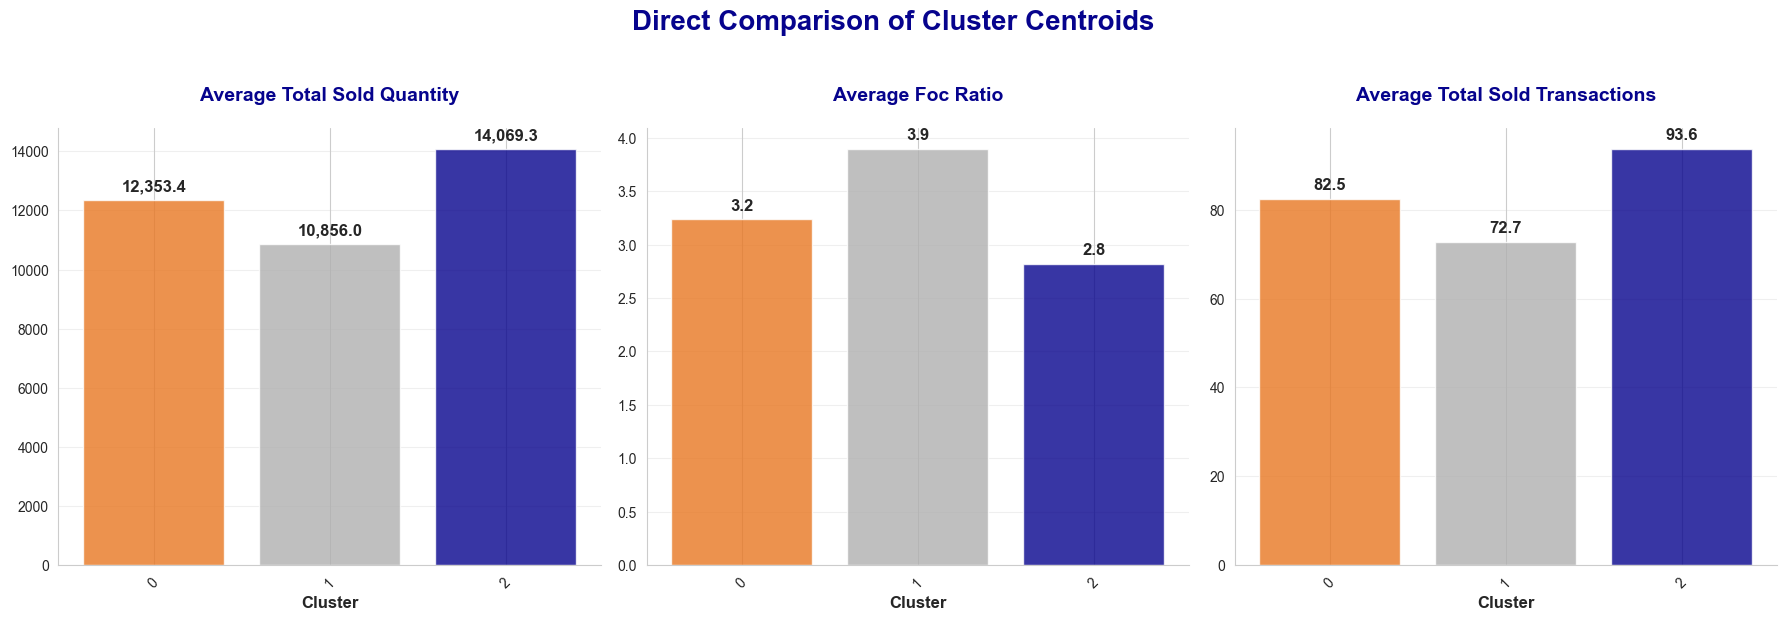

INFO:ml_pipeline.pipeline:
--- Persona Performance Summary ---
INFO:ml_pipeline.visualization:Creando gráficos de perfiles con 3 features...


            Customer Count  Total Sales Volume  % of Total Sales  \
persona                                                            
Champions             1055          14843108.0             33.57   
Loyalists             1597          19728390.0             44.62   
Potentials             888           9640118.0             21.80   

            % of Customers  
persona                     
Champions            29.80  
Loyalists            45.11  
Potentials           25.08  


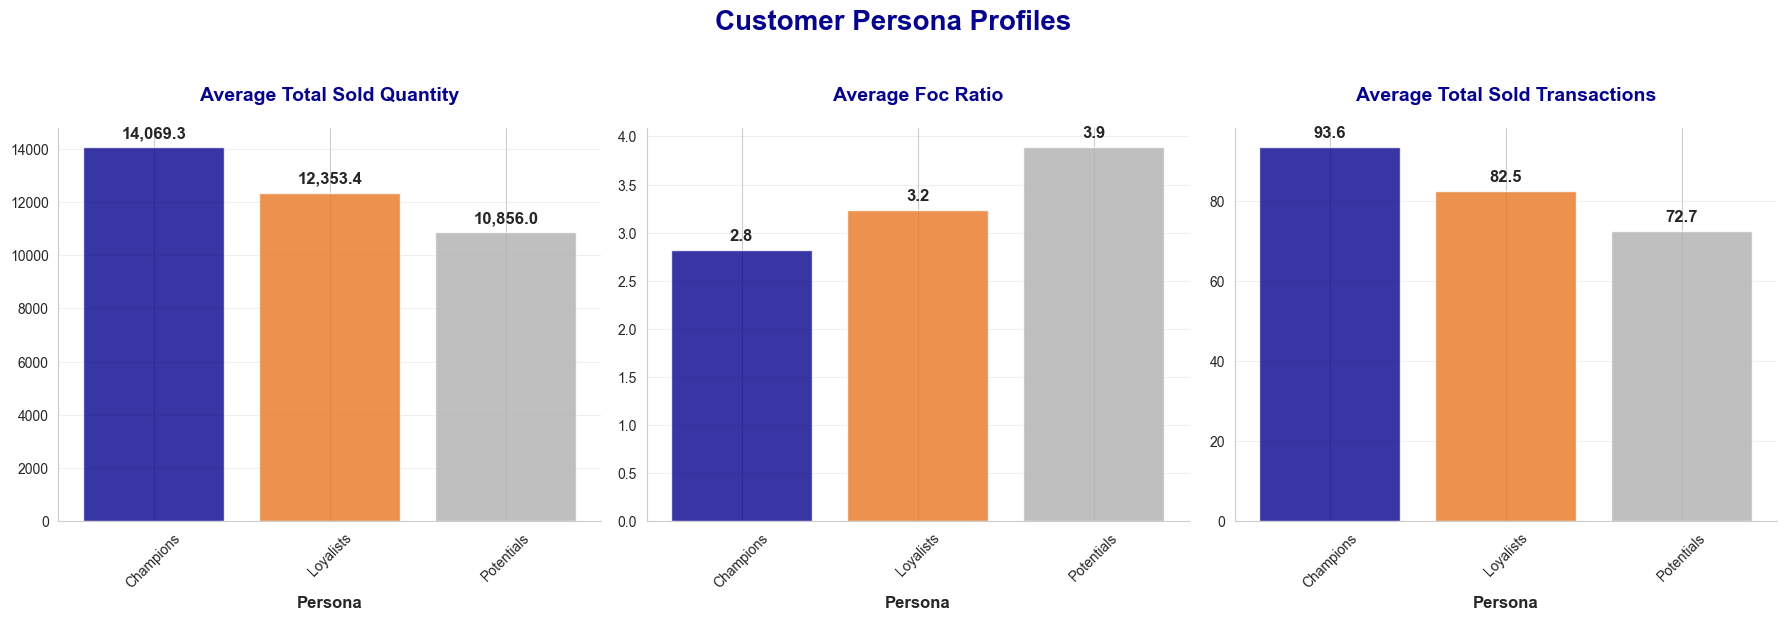

INFO:ml_pipeline.pipeline:
--- Final Segmentation Breakdown ---


            Customer Count  Total Sales Volume  % of Total Sales  \
persona                                                            
Champions             1055          14843108.0              33.6   
Loyalists             1597          19728390.0              44.6   
Potentials             888           9640118.0              21.8   

            % of Customers  
persona                     
Champions             29.8  
Loyalists             45.1  
Potentials            25.1  

✅ INTERACTIVE CLUSTERING COMPLETED!
🎯 Optimal K used: 3
🔧 Selected features: ['total_sold_quantity', 'foc_ratio', 'total_sold_transactions']
📊 Data with clusters: 3540 records

💾 Results saved in variables:
  • customer_data_with_clusters: DataFrame with assigned clusters
  • centroids_df: Cluster centroids
  • persona_kpis: KPIs by persona


In [10]:
# 🤖 Machine Learning: Customer Clustering with Unified Pipeline
# ==============================================================

# Import Werfen ML pipeline
import sys
from pathlib import Path

# Add src to path if not already there
src_path = str(Path.cwd().parent / 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

from ml_pipeline import WerfenMLPipeline

# Initialize ML pipeline
ml_pipeline = WerfenMLPipeline(
    db_path=str(config.main_database_path),
    output_dir="ml_outputs",
    random_state=42
)

print("🤖 STARTING INTERACTIVE CLUSTERING ANALYSIS")
print("=" * 50)

# Define persona mapping (you can modify based on your analysis)
cluster_persona_map = {
    0: 'Loyalists',      # High value, low FOC dependency
    1: 'Potentials',     # Need development, high FOC dependency
    2: 'Champions'       # Reliable business base
}

# 🎯 INTERACTIVE CONFIGURATION
# You can change these parameters:
K_RANGE = range(2, 8)           # Range to evaluate cluster numbers
OPTIMAL_K = 3                   # Specific K (or None for auto-optimization)
FEATURE_STRATEGY = 'business_driven'  # 'business_driven', 'statistical', 'hybrid'

print(f"🔧 Clustering configuration:")
print(f"  • K range for evaluation: {list(K_RANGE)}")
print(f"  • Selected K: {OPTIMAL_K}")
print(f"  • Feature strategy: {FEATURE_STRATEGY}")
print(f"  • Persona mapping: {cluster_persona_map}")

# Run complete interactive clustering
results = ml_pipeline.run_interactive_clustering(
    k_range=K_RANGE,
    optimal_k=OPTIMAL_K,                    # Change to None for auto-optimization
    feature_strategy=FEATURE_STRATEGY,
    persona_mapping=cluster_persona_map
)

print("\n✅ INTERACTIVE CLUSTERING COMPLETED!")
print("=" * 50)
print(f"🎯 Optimal K used: {results['optimal_k']}")
print(f"🔧 Selected features: {results['selected_features']}")
print(f"📊 Data with clusters: {len(results['customer_data_with_clusters'])} records")

# Save results for later use
customer_data_with_clusters = results['customer_data_with_clusters']
centroids_df = results['centroids_df']
persona_kpis = results['persona_kpis']

print(f"\n💾 Results saved in variables:")
print(f"  • customer_data_with_clusters: DataFrame with assigned clusters")
print(f"  • centroids_df: Cluster centroids")
print(f"  • persona_kpis: KPIs by persona")


In [11]:
# 📊 Additional Results Analysis
# =============================

print("📊 DETAILED RESULTS ANALYSIS")
print("=" * 50)

# 1. Cluster distribution
print("\n1️⃣ CLUSTER DISTRIBUTION:")
cluster_distribution = customer_data_with_clusters['cluster'].value_counts().sort_index()
print(cluster_distribution)

# 2. Show detailed centroids
print("\n2️⃣ CLUSTER CENTROIDS (Average Values):")
display(centroids_df.round(2))

# 3. Show sample data with assigned clusters
print("\n3️⃣ SAMPLE DATA WITH CLUSTERS:")
sample_data = customer_data_with_clusters[['customer_id', 'cluster', 'persona']].sample(10)
display(sample_data)

# 4. KPIs by persona
print("\n4️⃣ KPIs BY PERSONA:")
display(persona_kpis.round(2))

print("\n✅ Analysis completed. All visualizations were generated automatically.")
print("💡 TIP: Change OPTIMAL_K to None in previous cell for K auto-optimization")
print("🔧 TIP: Try different strategies: 'business_driven', 'statistical', 'hybrid'")


📊 DETAILED RESULTS ANALYSIS

1️⃣ CLUSTER DISTRIBUTION:
cluster
0    1597
1     888
2    1055
Name: count, dtype: int64

2️⃣ CLUSTER CENTROIDS (Average Values):


,total_sold_quantity,foc_ratio,total_sold_transactions,customer_count,pct_customers
cluster,,,,,
0,12353.41,3.23,82.49,1597,45.11
1,10855.99,3.89,72.66,888,25.08
2,14069.30,2.82,93.57,1055,29.80



3️⃣ SAMPLE DATA WITH CLUSTERS:


,customer_id,cluster,persona
1718,29,0,Loyalists
444,8,1,Potentials
594,10,0,Loyalists
57,1,0,Loyalists
1964,33,0,Loyalists
2418,41,2,Champions
625,11,2,Champions
451,8,2,Champions
761,13,0,Loyalists
924,16,1,Potentials



4️⃣ KPIs BY PERSONA:


,Customer Count,Total Sales Volume,% of Total Sales,% of Customers
persona,,,,
Champions,1055,14843108.0,33.57,29.80
Loyalists,1597,19728390.0,44.62,45.11
Potentials,888,9640118.0,21.80,25.08



✅ Analysis completed. All visualizations were generated automatically.
💡 TIP: Change OPTIMAL_K to None in previous cell for K auto-optimization
🔧 TIP: Try different strategies: 'business_driven', 'statistical', 'hybrid'


***
## 7. Data Warehouse Materialization (Reverse ETL)

Finally, we'll materialize our ML results in the data warehouse. This shows **Reverse ETL** - taking ML insights and making them available for operational use.

In [12]:
# Run ML model in dbt
print("🔄 MATERIALIZING ML RESULTS IN DATA WAREHOUSE")
print("=" * 60)
print("🎯 This shows REVERSE ETL: ML insights → Data Warehouse → Operational use")

# Change to dbt directory using configuration
original_dir = os.getcwd()
dbt_dir = config.dbt_project_folder
os.chdir(str(dbt_dir))

try:
    # Run persona status change model
    print("\n1️⃣ Running marts_persona_status_change model...")
    persona_result = subprocess.run([
        "dbt", "run", "--select", "marts_persona_status_change"
    ], capture_output=True, text=True)
    
    if persona_result.returncode == 0:
        print("✅ Persona model executed successfully")
        for line in persona_result.stdout.split('\n'):
            if 'OK created' in line:
                print(f"  {line.strip()}")
    
    # Run fct_transactions to include personas
    print("\n2️⃣ Running fct_transactions with personas...")
    fct_result = subprocess.run([
        "dbt", "run", "--select", "fct_transactions"
    ], capture_output=True, text=True)
    
    if fct_result.returncode == 0:
        print("✅ Facts table updated with personas")
        for line in fct_result.stdout.split('\n'):
            if 'OK created' in line:
                print(f"  {line.strip()}")
                
finally:
    os.chdir(original_dir)

print("\n🎯 REVERSE ETL COMPLETED: ML insights now available in data warehouse")


🔄 MATERIALIZING ML RESULTS IN DATA WAREHOUSE
🎯 This shows REVERSE ETL: ML insights → Data Warehouse → Operational use

1️⃣ Running marts_persona_status_change model...
✅ Persona model executed successfully
  13:14:02  1 of 1 OK created python table model main_marts.marts_persona_status_change .... [OK in 3.67s]

2️⃣ Running fct_transactions with personas...
✅ Facts table updated with personas
  13:14:06  1 of 1 OK created sql table model main_marts.fct_transactions .................. [OK in 0.42s]

🎯 REVERSE ETL COMPLETED: ML insights now available in data warehouse


In [13]:
analyzer.analyze_table_metadata('fct_transactions', 'main_marts', show_sample=True)

🏷️  DETAILED ANALYSIS: main_marts.fct_transactions
📊 BASIC STATISTICS:
   • Records: 6,000 rows
   • Columns: 18
   • Estimated size: 0.82 MB

📋 DATA SCHEMA:
   • surrogate_id: VARCHAR
   • customer_id: BIGINT
   • transaction_date: DATE
   • persona_type: VARCHAR
   • total_sold_quantity: HUGEINT
   • total_foc_quantity: HUGEINT
   • total_transactions: BIGINT
   • sold_transactions: BIGINT
   • foc_transactions: BIGINT
   • unique_materials: BIGINT
   • median_sold_order_size: DOUBLE
   • median_foc_order_size: DOUBLE
   • foc_ratio: DOUBLE
   • sales_ratio: DOUBLE
   • is_foc_focused: INTEGER
   • is_sales_focused: INTEGER
   • is_diverse_buyer: INTEGER
   • dbt_updated_at: TIMESTAMP WITH TIME ZONE

🧪 DBT TESTS EXECUTED:

📋 DATA QUALITY:
   ✅ not null surrogate id
   ✅ not null customer id

📋 DATA INTEGRITY:
   ✅ unique surrogate id

📋 REFERENTIAL INTEGRITY:
   ❌ relationships customer id

📋 BUSINESS LOGIC:
   ✅ expression is true total transactions

📊 DBT TESTS SUMMARY:
   • Total 

{'table_name': 'fct_transactions',
 'schema': [{'column_name': 'surrogate_id', 'column_type': 'VARCHAR'},
  {'column_name': 'customer_id', 'column_type': 'BIGINT'},
  {'column_name': 'transaction_date', 'column_type': 'DATE'},
  {'column_name': 'persona_type', 'column_type': 'VARCHAR'},
  {'column_name': 'total_sold_quantity', 'column_type': 'HUGEINT'},
  {'column_name': 'total_foc_quantity', 'column_type': 'HUGEINT'},
  {'column_name': 'total_transactions', 'column_type': 'BIGINT'},
  {'column_name': 'sold_transactions', 'column_type': 'BIGINT'},
  {'column_name': 'foc_transactions', 'column_type': 'BIGINT'},
  {'column_name': 'unique_materials', 'column_type': 'BIGINT'},
  {'column_name': 'median_sold_order_size', 'column_type': 'DOUBLE'},
  {'column_name': 'median_foc_order_size', 'column_type': 'DOUBLE'},
  {'column_name': 'foc_ratio', 'column_type': 'DOUBLE'},
  {'column_name': 'sales_ratio', 'column_type': 'DOUBLE'},
  {'column_name': 'is_foc_focused', 'column_type': 'INTEGER'},


***
## Summary: End-to-End Pipeline Completed



**✅ Implemented Components:**

1. **🔧 Raw Layer**: Data ingestion from SQLite to DuckDB
2. **🧹 Staging Layer**: Data canonization and cleaning
3. **⚙️ Intermediate Layer**: Business logic and aggregations
4. **📊 Marts Layer**: Final models for analysis
5. **🤖 Machine Learning**: K-means clustering for segmentation
6. **👥 Business Personas**: Champions, Loyalists, Potentials, Not Active
7. **🔄 Reverse ETL**: ML insights integration in data warehouse

**🎯 Business Value Delivered:**

- **Smart Segmentation**: Automatic customer type identification
- **Predictive Analysis**: Foundation for personalized strategies
- **Scalable Architecture**: Framework for future growth
- **Data Quality**: Pipeline with integrated validations
- **Automation**: Reproducible end-to-end process
- **Operationalization**: ML insights available for business use

---

**Modern data pipeline with integrated ML and unified configuration completed successfully!** 🎯